In [14]:
import pandas as pd
import numpy as np
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
filename = 'C:/Users/subar/Downloads/CMPE-255 Sec 99 - Data Mining/Home Works/HW_Extra/student/student-mat.csv'
data = pd.read_csv(filename)
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [8]:
#see the columns in our data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [10]:
numAttributes = data.select_dtypes(include=['int64'])
numAttributes

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,5,4,11,9,9,9
391,17,3,1,2,1,0,2,4,5,3,4,2,3,14,16,16
392,21,1,1,1,1,3,5,5,3,3,3,3,3,10,8,7
393,18,3,2,3,1,0,4,4,1,3,4,5,0,11,12,10


In [39]:
#create our X and y
X = numAttributes.drop(['G3'], axis=1)
y = numAttributes['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [40]:
#linear regression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print('Training score%: ',lr_model.score(X_train, y_train) *100, '%')
print('Test score: ',lr_model.score(X_test, y_test)*100, '%')

y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

print('RMSE: {}'.format(rmse))


Training score%:  84.94776543596151 %
Test score:  80.49063890373247 %
RMSE: 2.0708839001184685


In [41]:
#creating polynomial features

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
]

pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

print('Training score%: ',pipeline.score(X_train, y_train) *100, '%')
print('Test score: ',pipeline.score(X_test, y_test)*100, '%')
# Testing score has decreased due to overfitting

Training score%:  93.10073473326045 %
Test score:  66.30630737051591 %


In [42]:
#regularization

In [45]:
#l2 Regularization or Ridge Regression-alpha value =.01

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=.01, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, y_train)


print('Training score%: ',ridge_pipe.score(X_train, y_train) *100, '%')
print('Test score: ',ridge_pipe.score(X_test, y_test)*100, '%')

mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

print('RMSE: {}'.format(rmse))

Training score%:  93.10072970999369 %
Test score:  66.32703779920287 %
RMSE: 2.0708839001184685


In [68]:
#l2 Regularization or Ridge Regression-alpha value =10

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=10, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, y_train)


print('Training score%: ',ridge_pipe.score(X_train, y_train) *100, '%')
print('Test score: ',ridge_pipe.score(X_test, y_test)*100, '%')

mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

print('RMSE: {}'.format(rmse))


Training score%:  92.31426420378129 %
Test score:  71.80494844150981 %
RMSE: 2.0708839001184685


In [67]:
#l2 Regularization or Ridge Regression-alpha value =100

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=100, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, y_train)


print('Training score%: ',ridge_pipe.score(X_train, y_train) *100, '%')
print('Test score: ',ridge_pipe.score(X_test, y_test)*100, '%')

mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

print('RMSE: {}'.format(rmse))


Training score%:  86.81847871793414 %
Test score:  73.68383324073095 %
RMSE: 2.0708839001184685


In [71]:

rr10 = Ridge(alpha=10) #  comparison with alpha value
rr10.fit(X_train, y_train)
Ridge_train_score10 = rr10.score(X_train,y_train)
Ridge_test_score10 = rr10.score(X_test, y_test)



rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)

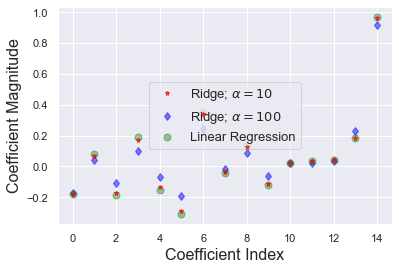

In [82]:
plt.plot(rr10.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 10$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(lr_model.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=10)
plt.show()

In [44]:
# l1 Regularization or Lasso Regression

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=0.3, fit_intercept=True))
]

lasso_pipe = Pipeline(steps)
lasso_pipe.fit(X_train, y_train)


print('Training score%: ',lasso_pipe.score(X_train, y_train) *100, '%')
print('Test score: ',lasso_pipe.score(X_test, y_test)*100, '%')

mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

print('RMSE: {}'.format(rmse))


Training score%:  82.76858766039767 %
Test score:  80.00079885402924 %
RMSE: 2.0708839001184685
